<a href="https://colab.research.google.com/github/hhhrany/zoolab-python/blob/main/%EC%B5%9C%EC%A2%85_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%ED%81%AC%EB%A6%AC%EB%84%A5%EC%8A%A4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

최종 프로젝트(크리넥스)

- 초등 6-1 사회 3단원 '세계 속의 우리나라 경제' 수업에서 활용할 수 있도록 구상해보았습니다.
- 우리나라의 무역 현황 데이터 파일은 한국무역협회(k-stat)에서 다운로드 하였습니다.
- 궁금한 년도를 입력하면 그 해의 수출, 수입, 무역수지 금액을 알 수 있습니다.
- 마지막으로 그래프를 통해 시각적으로 변화를 확인할 수 있게 하였습니다.

In [21]:
# 파일 업로드
from google.colab import files
files.upload()

Saving ktrade.csv to ktrade (2).csv


{'ktrade.csv': b'\xef\xbb\xbf\xeb\x85\x84\xeb\x8f\x84,\xec\x88\x98\xec\xb6\x9c,\xec\x88\x98\xec\x9e\x85,\xec\x88\x98\xec\xa7\x80\r\n2022,411101526,426354670,-15253144\r\n2021,644400368,615093447,29306921\r\n2020,512498038,467632763,44865275\r\n2019,542232610,503342947,38889663\r\n2018,604859657,535202428,69657229\r\n2017,573694421,478478296,95216125\r\n2016,495425940,406192887,89233053\r\n2015,526756503,436498973,90257530\r\n2014,572664607,525514506,47150101\r\n2013,559632434,515585515,44046919\r\n2012,547869792,519584473,28285319\r\n2011,555213656,524413090,30800566\r\n2010,466383762,425212160,41171602\r\n2009,363533561,323084521,40449040\r\n2008,422007328,435274737,-13267409\r\n2007,371489086,356845733,14643353\r\n2006,325464848,309382632,16082216\r\n2005,284418743,261238264,23180479\r\n2004,253844672,224462687,29381985\r\n2003,193817443,178826657,14990786\r\n'}

In [26]:
# 우리나라 수출과 수입 현황 알아보기(원하는 년도)

import time
print('--------------------------------------------------------------------------------------')
time.sleep(1)
print('사회 시간입니다. 이번 시간에는 지난 20년간 우리나라의 무역 현황에 대해 공부하겠습니다.')
time.sleep(1)
print('--------------------------------------------------------------------------------------')
time.sleep(2)

import csv
data = csv.reader(open('ktrade.csv'))
next(data)

year = input('우리나라의 수출, 수입 금액을 알고싶은 년도를 입력해주세요(2003~2022) : ')
for row in data : 
  if year in row[0] :
    print('----------------------------------------------------------------------------------')
    print(year+'년 우리나라의 수출 금액은 '+str(row[1])+'원이며, 수입 금액은 '+str(row[2])+'원입니다.')
    time.sleep(2)
    if int(row[1]) - int(row[2]) > 0 :
      print(year + '년도에는 수출 금액이 수입 금액보다 '+ str(int(row[1]) - int(row[2])) + '원 크며, 무역수지 흑자입니다.')
    else : 
      print(year + '년도에는 수입 금액이 수출 금액보다 '+ str(int(row[2]) - int(row[1])) + '원 크며, 무역수지 적자입니다.')




--------------------------------------------------------------------------------------
사회 시간입니다. 이번 시간에는 지난 20년간 우리나라의 무역 현황에 대해 공부하겠습니다.
--------------------------------------------------------------------------------------
우리나라의 수출, 수입 금액을 알고싶은 년도를 입력해주세요(2003~2022) : 2022
----------------------------------------------------------------------------------
2022년 우리나라의 수출 금액은 411101526원이며, 수입 금액은 426354670원입니다.
2022년도에는 수입 금액이 수출 금액보다 15253144원 크며, 무역수지 적자입니다.


In [27]:
# 한글폰트 설치
!apt-get install fonts-nanum -qq > /dev/null 
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


2003~2022 우리나라의 무역 현황 중 어떤 것의 변화 그래프를 보시겠습니까? (수출 / 수입 / 무역수지) : 무역수지


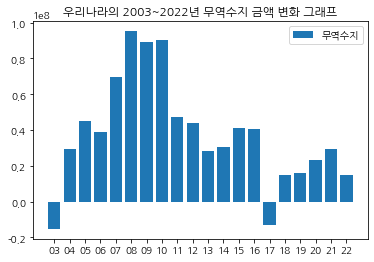

In [51]:
# 우리나라 수출과 수입, 무역수지 현황 그래프로 그려보기

import matplotlib.pyplot as plt
import csv
data = csv.reader(open('ktrade.csv'))
next(data)

tg = []
graph = input('2003~2022 우리나라의 무역 현황 중 어떤 것의 변화 그래프를 보시겠습니까? (수출 / 수입 / 무역수지) : ')

# 수출 그래프
if graph == '수출' : 
  for row in data :
    tg.append(int(row[1]))
elif graph == '수입' : 
  for row in data :
    tg.append(int(row[2]))
else : 
  for row in data :
    tg.append(int(row[3]))

year = ['03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']

plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.bar(year, tg, label = graph)
plt.legend()
plt.title('우리나라의 2003~2022년 ' + graph + ' 금액 변화 그래프')
plt.show()